In [194]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

# Loading and reading the data

In [195]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**As the non null count is not same for all columns so some values are missing**

In [197]:
df.shape


(9240, 37)

In [198]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Exploratory data analysis

In [199]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [200]:
# Replacing 'Select' with NaN
df = df.replace('select',np.nan)
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## **Dropping the not required columns**

In [201]:
# Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [202]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

**Dropping the columns that have high percentage of missing values**

In [203]:
df2 = df1.drop(['Prospect ID','Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score',
                'Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education',
                'City','Lead Number'],axis=1)
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [204]:
#checking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [205]:
df2['What matters most to you in choosing a course'].value_counts()

better career prospects      6528
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

**Filling the not known values with 'unknown'**

In [206]:
#Replacing the missing values with 'unknown'
df2['Specialization'] = df2['Specialization'].fillna('unknown') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('unknown')
df2['Country'] = df2['Country'].fillna('unknown')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('unknown')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [207]:
 #Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [208]:
df2.Country.value_counts()

india                   6492
unknown                 2466
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
kuwait                     4
south africa               4
germany                    4
canada                     4
nigeria                    4
sweden                     3
italy                      2
ghana                      2
philippines                2
china                      2
bangladesh                 2
asia/pacific region        2
belgium                    2
netherlands                2
uganda                     2
russia                     1
denmark                    1
vietnam                    1
malaysia                   1
liberia                    1
indonesia                  1
sri lanka     

In [209]:
#As we can see majority are from india and otheres are from outside india so segregating as 'in india' and 'outside india'

def divide_country(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "unknown":
        category = "unknown"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:divide_country(x['Country']), axis = 1)
df2['Country'].value_counts()

india            6492
unknown          2466
outside india     282
Name: Country, dtype: int64

In [210]:
#Dropping the records for missing values which are only 1%
df3 = df2[df2.isnull().sum(axis=1) <1]

In [211]:
#Checking the missing records
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

### Visualizing the data

**Visualization of data of individual columns**

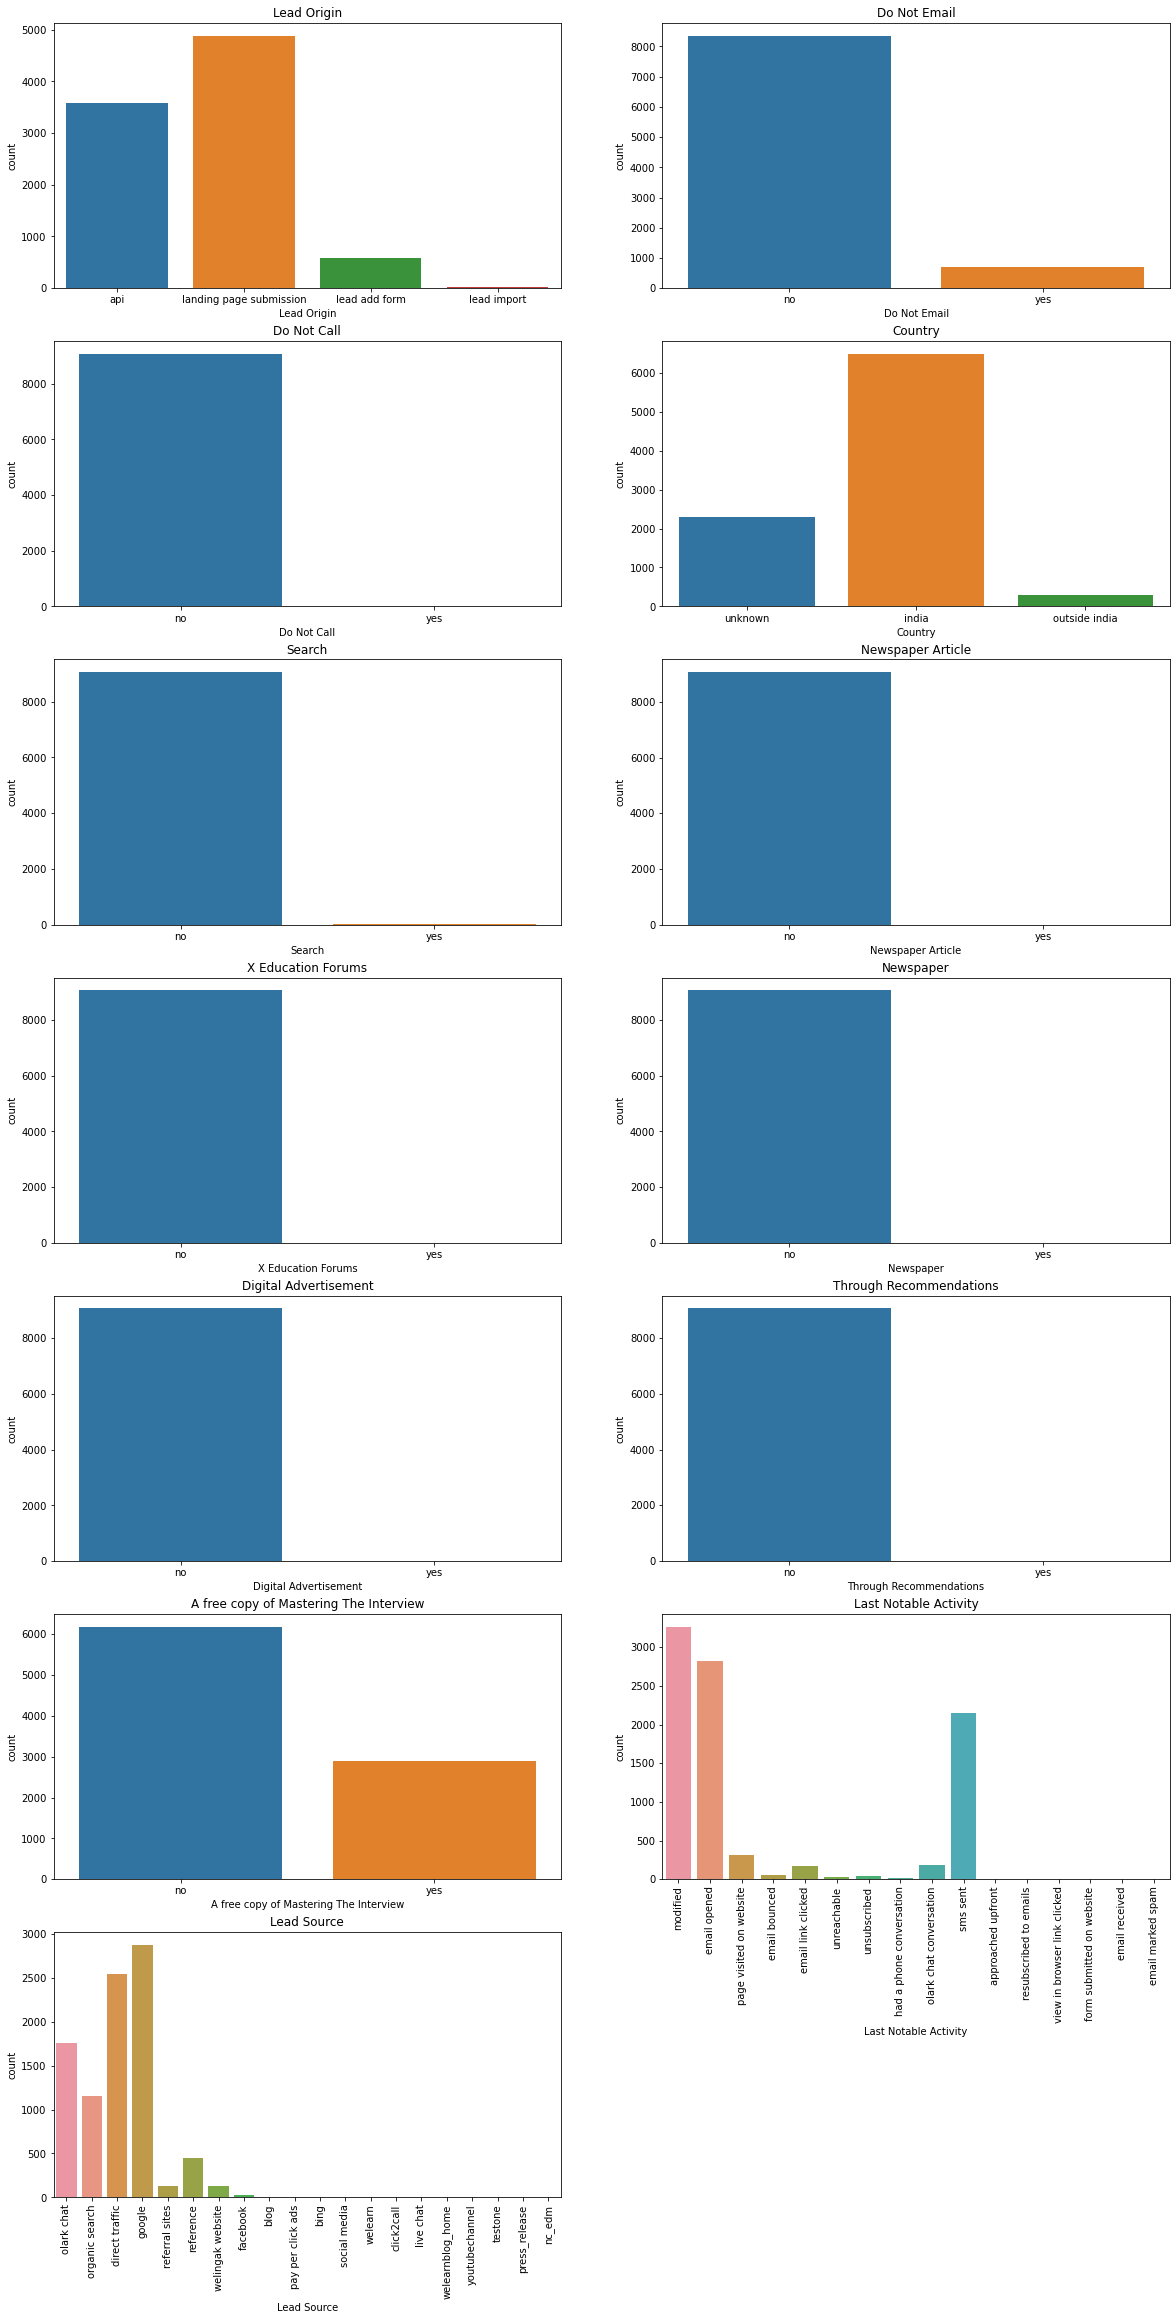

In [212]:
plt.figure(figsize = (20,40))

plt.subplot(7,2,1)
sns.countplot(df3['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(7,2,2)
sns.countplot(df3['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(7,2,3)
sns.countplot(df3['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(7,2,4)
sns.countplot(df3['Country'])
plt.title('Country')

plt.subplot(7,2,5)
sns.countplot(df3['Search'])
plt.title('Search')

plt.subplot(7,2,6)
sns.countplot(df3['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(7,2,7)
sns.countplot(df3['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(7,2,8)
sns.countplot(df3['Newspaper'])
plt.title('Newspaper')

plt.subplot(7,2,9)
sns.countplot(df3['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(7,2,10)
sns.countplot(df3['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(7,2,11)
sns.countplot(df3['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(7,2,12)
sns.countplot(df3['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(7,2,13)
sns.countplot(df3['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')


plt.show()

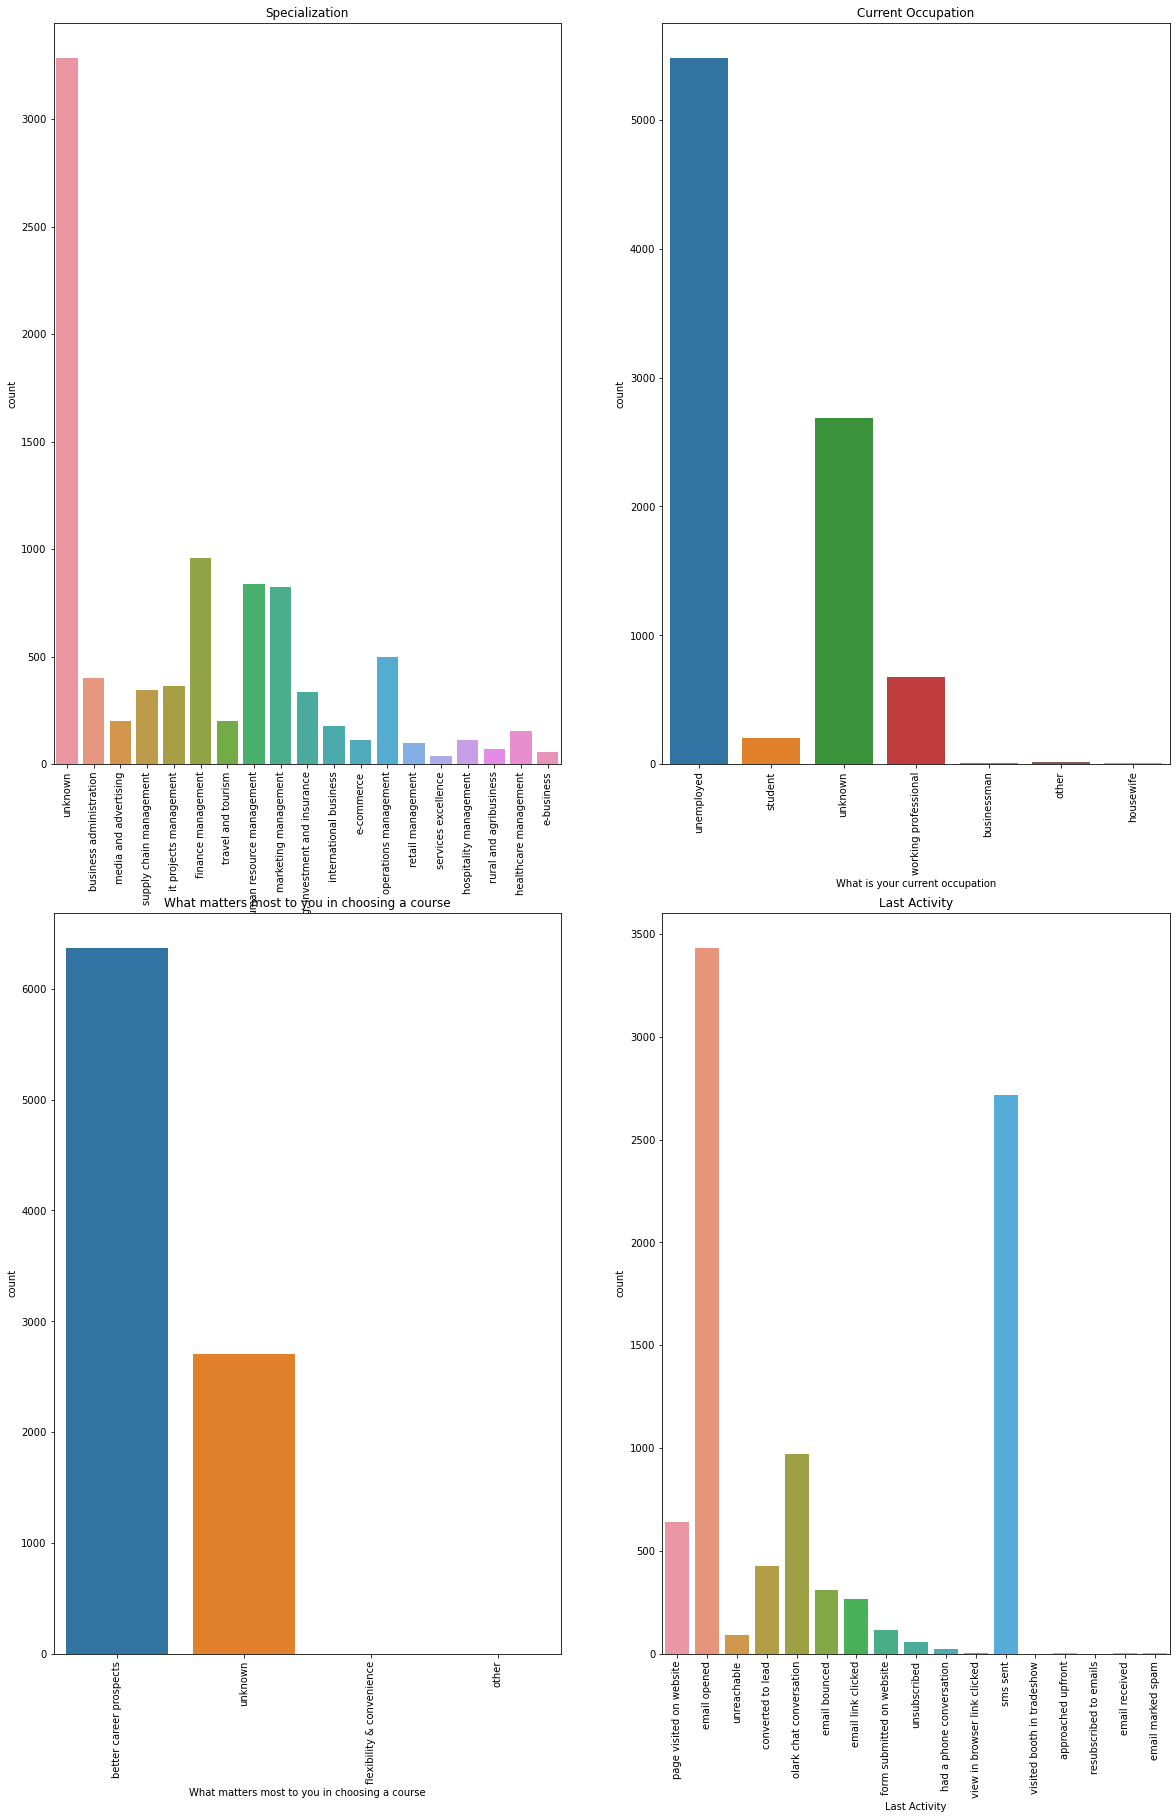

In [213]:

plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df3['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df3['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df3['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df3['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

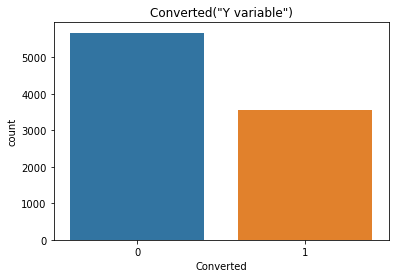

In [214]:

sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

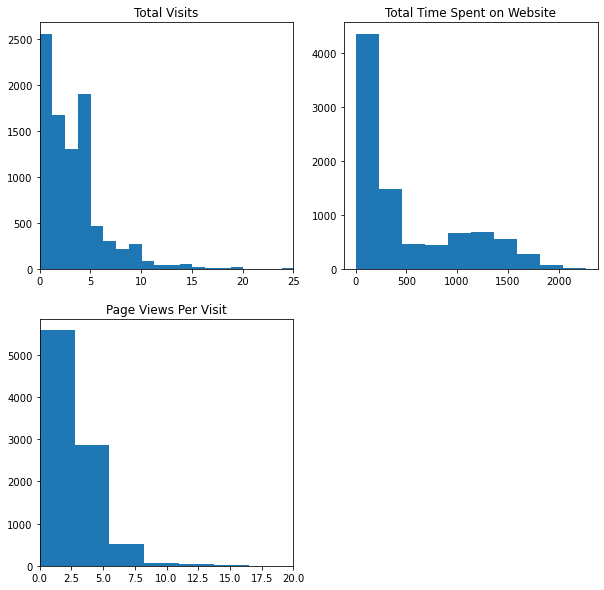

In [215]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df3['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df3['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df3['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Visulaization w.r.t target column 

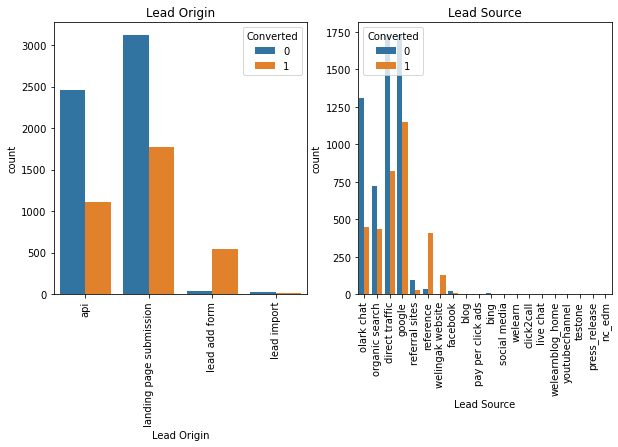

In [216]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

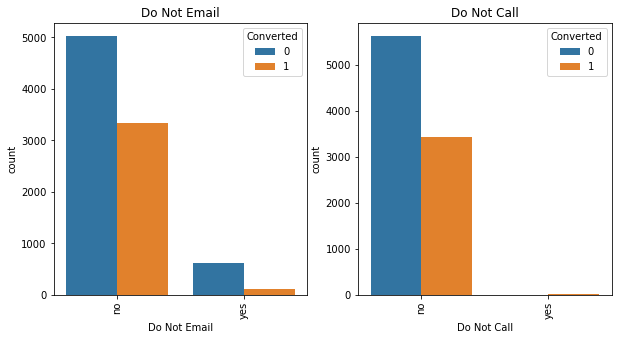

In [217]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

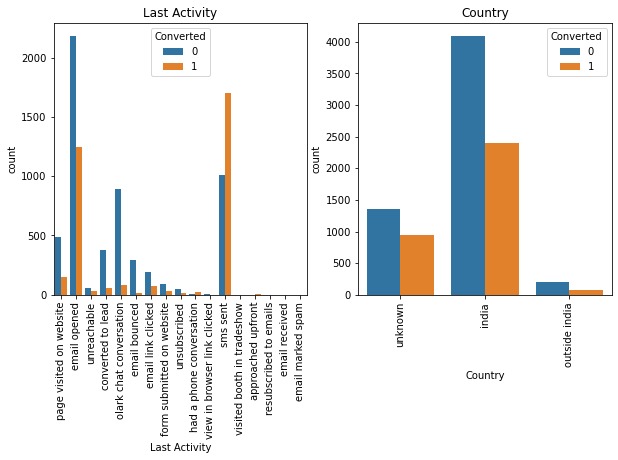

In [218]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

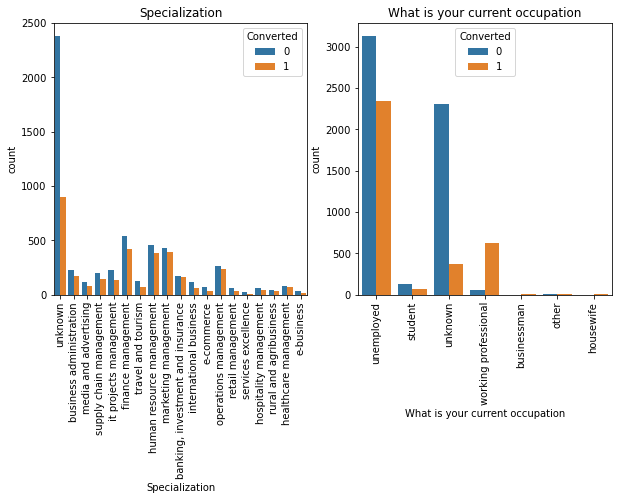

In [219]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

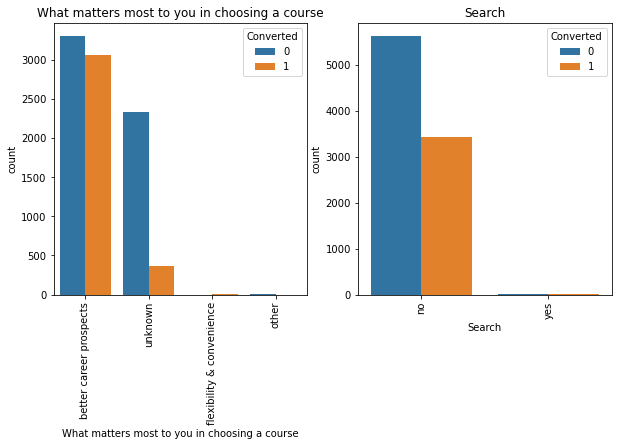

In [220]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

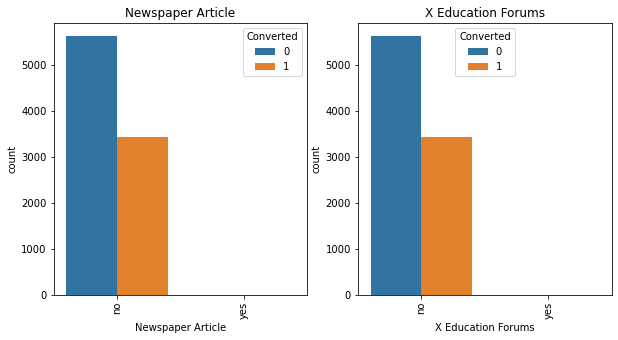

In [221]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

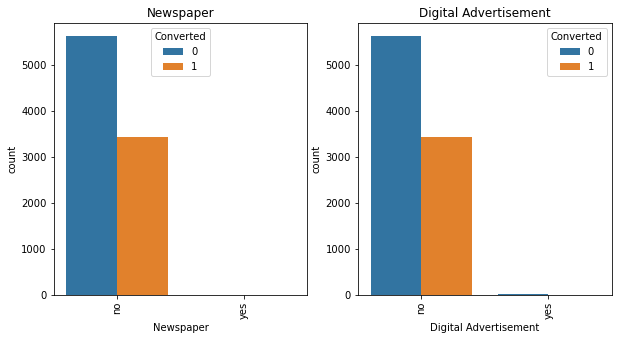

In [222]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

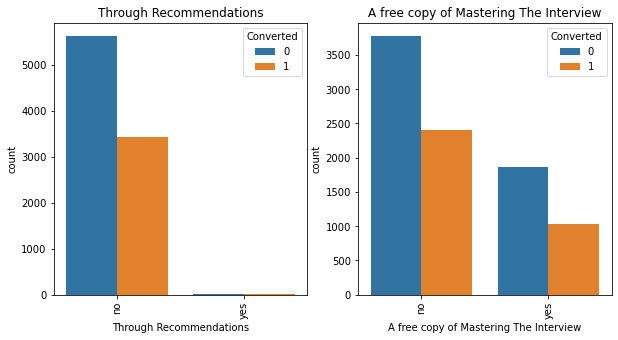

In [223]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

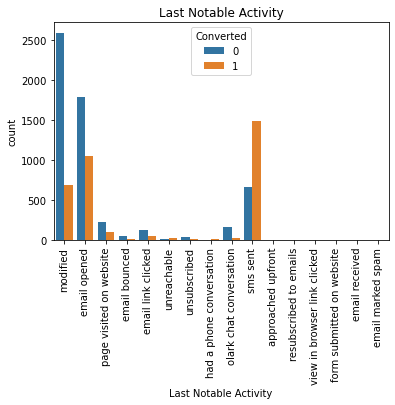

In [224]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

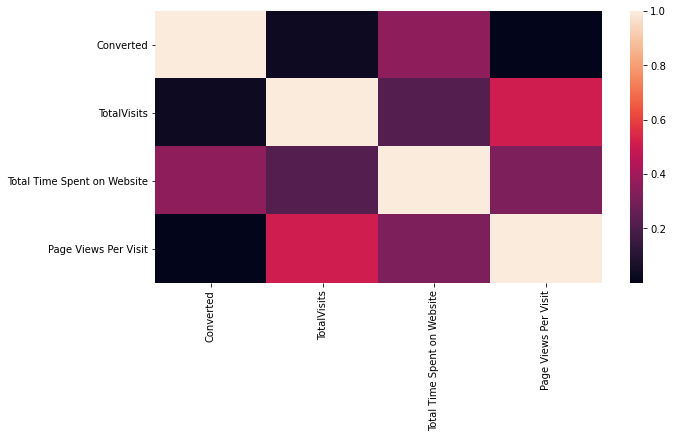

In [225]:
plt.figure(figsize=(10,5))
sns.heatmap(df3.corr())
plt.show()

### Encoding of the categorical variables

In [226]:
df3.loc[:, df3.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [227]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df3[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df3, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,unknown,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [228]:
df_final_dum = df_final_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [229]:
X = df_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [230]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

**Test train split and Standardisation**

In [231]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [232]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


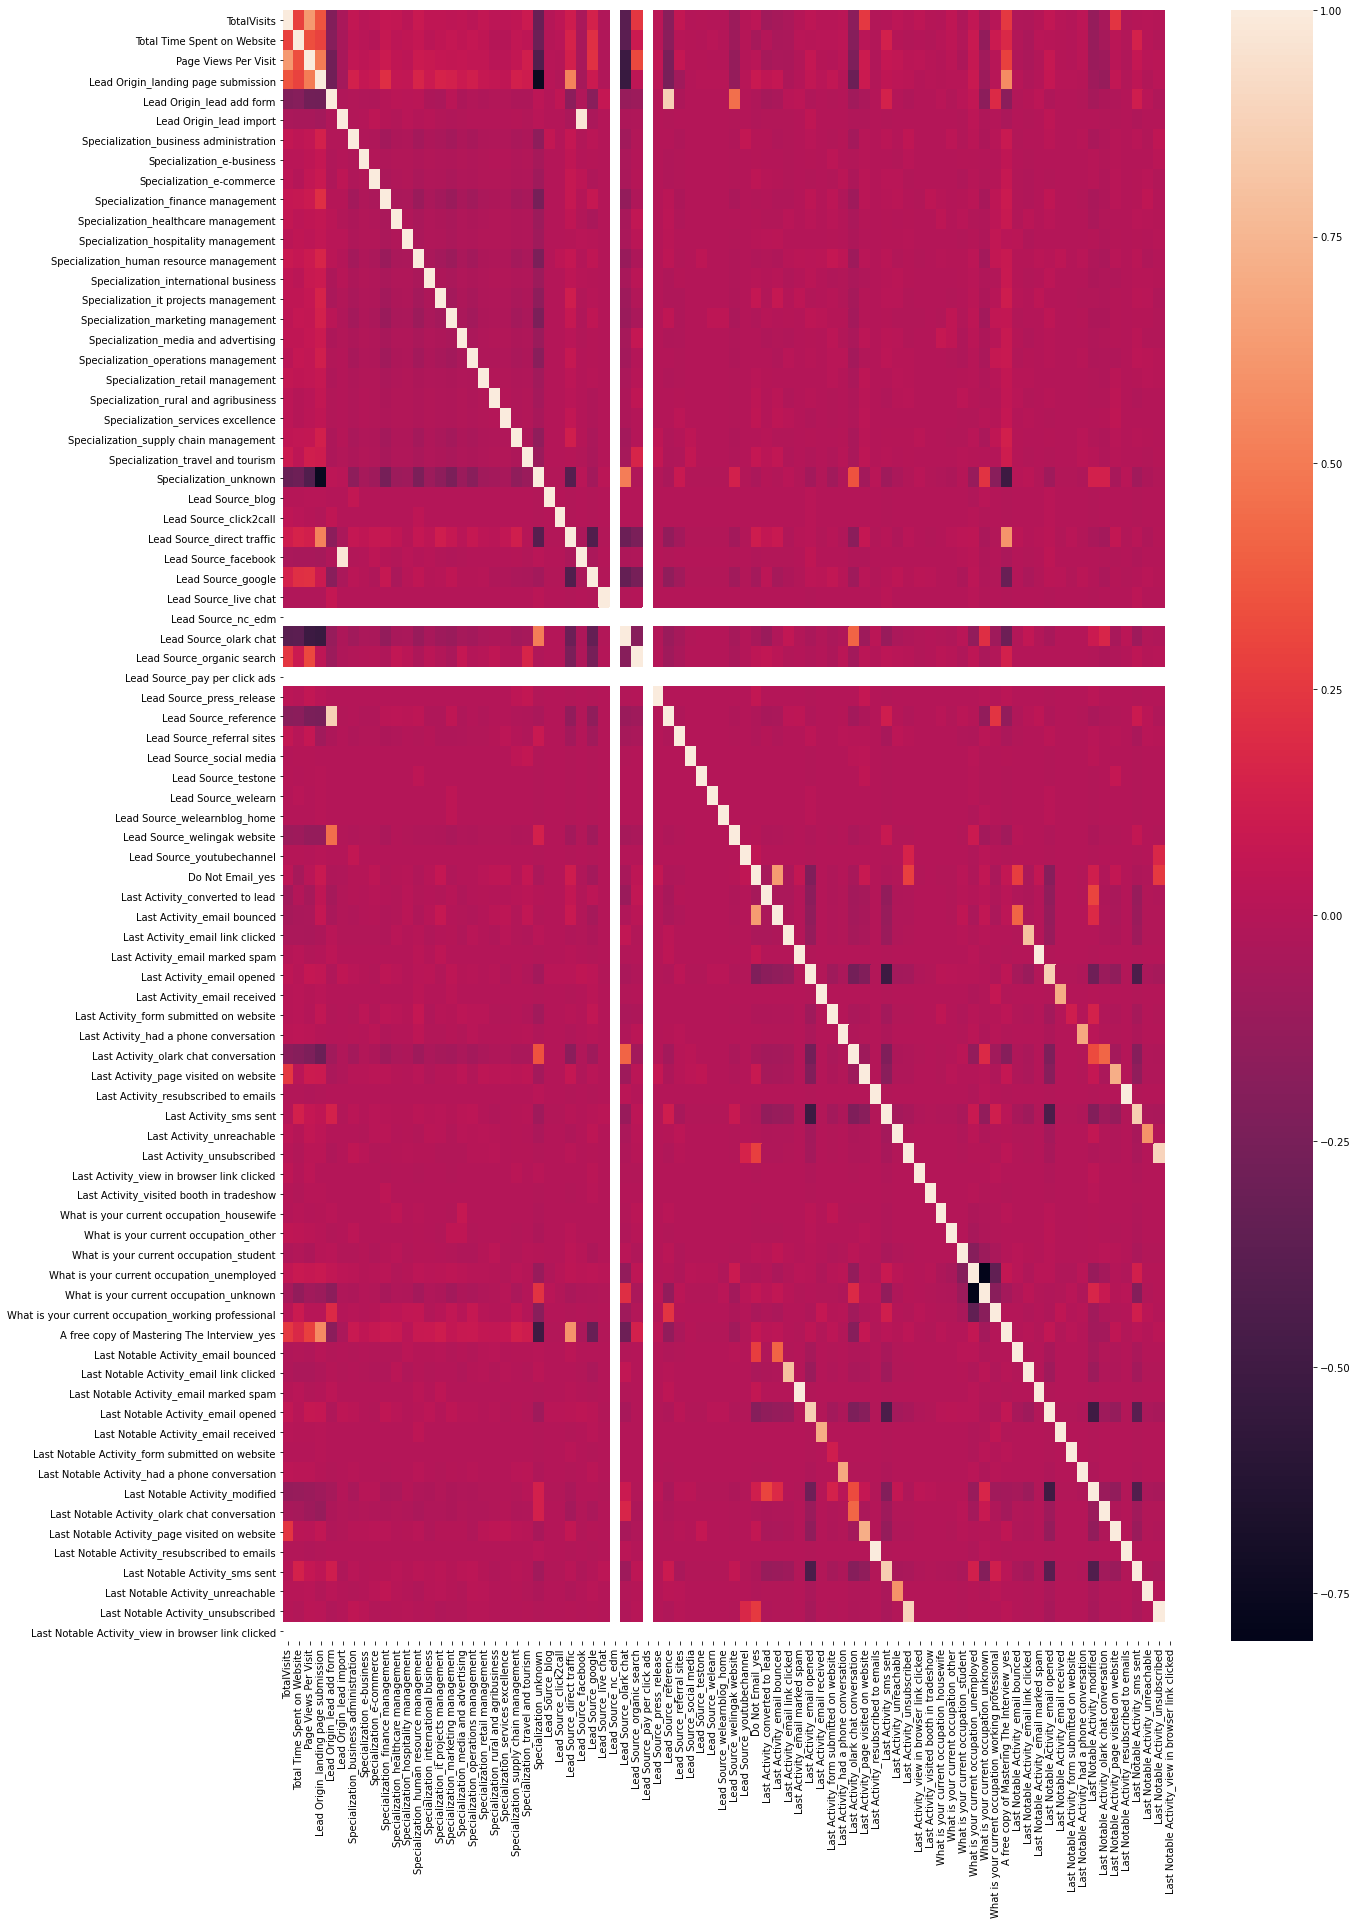

In [233]:
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

# Model Building

In [234]:
lg = LogisticRegression()

In [235]:
rfe = RFE(lg, 15)
rfe = rfe.fit(X_train, y_train)

In [236]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 42),
 ('Specialization_business administration', False, 48),
 ('Specialization_e-business', False, 57),
 ('Specialization_e-commerce', False, 60),
 ('Specialization_finance management', False, 50),
 ('Specialization_healthcare management', False, 56),
 ('Specialization_hospitality management', False, 6),
 ('Specialization_human resource management', False, 49),
 ('Specialization_international business', False, 36),
 ('Specialization_it projects management', False, 55),
 ('Specialization_marketing management', False, 64),
 ('Specialization_media and advertising', False, 29),
 ('Specialization_operations management', False, 54),
 ('Specialization_retail management', False, 17),
 ('Specialization_rural and agribusiness', False, 65),
 ('Specialization_service

In [237]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [238]:

# Selecting columns selected by RFE
X_train = X_train[col]

In [239]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.4
Date:                Tue, 09 Nov 2021   Deviance:                       5254.8
Time:                        08:17:11   Pearson chi2:                 6.47e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0581      0.106    -19.428      0.000      -2.266      -1.850
TotalVisits                                              6.0485      1.492      4.055      0.000       3.125       8.972
Total Time Spent on Website                              4.6258      0.167     27.671      0.000       4.298       4.954
Lead Origin_landing page submission                     -0.3558      0.090     -3.968      0.000      -0.532      -0.180
Lead Origin_lead add form                                3.4941      0.233     14.964      0.000       3.036       3.952
Lead Source_olark chat                                   1.3633      0.125     10.867      0.000       1.117       1.609
Lead Source_welingak website                             2.5968      1.033      2.514      0.012       0.572       4.621
Do Not Email_yes                                        -1.4093      0.171     -8.220      0.000      -1.745      -1.073
Last Activity_had a phone conversation                   0.4998      0.849      0.589      0.556      -1.165       2.164
Last Activity_olark chat conversation                   -1.4409      0.168     -8.566      0.000      -1.771      -1.111
Last Activity_sms sent                                   1.2875      0.074     17.370      0.000       1.142       1.433
What is your current occupation_housewife               24.2817   3.05e+04      0.001      0.999   -5.97e+04    5.97e+04
What is your current occupation_unknown                 -1.2097      0.086    -13.998      0.000      -1.379      -1.040
What is your current occupation_working professional     2.5373      0.194     13.107      0.000       2.158       2.917
Last Notable Activity_had a phone conversation          23.5521   2.14e+04      0.001      0.999   -4.19e+04    4.19e+04
Last Notable Activity_unreachable                        1.8019      0.602      2.992      0.003       0.621       2.982
========================================================================================================================
"""

In [240]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,2.38
0,TotalVisits,2.03
1,Total Time Spent on Website,2.00
7,Last Activity_had a phone conversation,1.89
13,Last Notable Activity_had a phone conversation,1.89
4,Lead Source_olark chat,1.55
9,Last Activity_sms sent,1.52
3,Lead Origin_lead add form,1.47
11,What is your current occupation_unknown,1.45
8,Last Activity_olark chat conversation,1.40


In [241]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [242]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.1
Date:                Tue, 09 Nov 2021   Deviance:                       5262.2
Time:                        08:17:11   Pearson chi2:                 6.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0597      0.106    -19.441      0.000      -2.267      -1.852
TotalVisits                                              6.0994      1.492      4.087      0.000       3.174       9.025
Total Time Spent on Website                              4.6160      0.167     27.642      0.000       4.289       4.943
Lead Origin_landing page submission                     -0.3505      0.090     -3.910      0.000      -0.526      -0.175
Lead Origin_lead add form                                3.4921      0.234     14.952      0.000       3.034       3.950
Lead Source_olark chat                                   1.3657      0.125     10.885      0.000       1.120       1.612
Lead Source_welingak website                             2.6011      1.033      2.518      0.012       0.577       4.626
Do Not Email_yes                                        -1.4130      0.171     -8.248      0.000      -1.749      -1.077
Last Activity_had a phone conversation                   1.9215      0.685      2.807      0.005       0.580       3.263
Last Activity_olark chat conversation                   -1.4396      0.168     -8.560      0.000      -1.769      -1.110
Last Activity_sms sent                                   1.2872      0.074     17.373      0.000       1.142       1.432
What is your current occupation_housewife               23.2791   1.85e+04      0.001      0.999   -3.62e+04    3.63e+04
What is your current occupation_unknown                 -1.2115      0.086    -14.018      0.000      -1.381      -1.042
What is your current occupation_working professional     2.5351      0.194     13.097      0.000       2.156       2.915
Last Notable Activity_unreachable                        1.8015      0.602      2.992      0.003       0.621       2.982
========================================================================================================================
"""

In [243]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,2.38
0,TotalVisits,2.03
1,Total Time Spent on Website,2.00
4,Lead Source_olark chat,1.55
9,Last Activity_sms sent,1.52
3,Lead Origin_lead add form,1.47
11,What is your current occupation_unknown,1.45
8,Last Activity_olark chat conversation,1.39
5,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.19


In [244]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [245]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.1
Date:                Tue, 09 Nov 2021   Deviance:                       5272.1
Time:                        08:17:11   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0521      0.106    -19.406      0.000      -2.259      -1.845
TotalVisits                                              6.0334      1.486      4.060      0.000       3.121       8.946
Total Time Spent on Website                              4.6120      0.167     27.644      0.000       4.285       4.939
Lead Origin_landing page submission                     -0.3468      0.090     -3.874      0.000      -0.522      -0.171
Lead Origin_lead add form                                3.4943      0.233     14.975      0.000       3.037       3.952
Lead Source_olark chat                                   1.3617      0.125     10.863      0.000       1.116       1.607
Lead Source_welingak website                             2.5941      1.033      2.511      0.012       0.570       4.619
Do Not Email_yes                                        -1.4161      0.171     -8.270      0.000      -1.752      -1.080
Last Activity_had a phone conversation                   1.9152      0.684      2.799      0.005       0.574       3.257
Last Activity_olark chat conversation                   -1.4424      0.168     -8.578      0.000      -1.772      -1.113
Last Activity_sms sent                                   1.2816      0.074     17.311      0.000       1.137       1.427
What is your current occupation_unknown                 -1.2146      0.086    -14.062      0.000      -1.384      -1.045
What is your current occupation_working professional     2.5297      0.194     13.073      0.000       2.150       2.909
Last Notable Activity_unreachable                        1.7964      0.602      2.984      0.003       0.616       2.976
========================================================================================================================
"""

In [246]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,2.38
0,TotalVisits,2.03
1,Total Time Spent on Website,2.00
4,Lead Source_olark chat,1.55
9,Last Activity_sms sent,1.52
3,Lead Origin_lead add form,1.47
10,What is your current occupation_unknown,1.45
8,Last Activity_olark chat conversation,1.39
5,Lead Source_welingak website,1.31
11,What is your current occupation_working profes...,1.19


In [247]:
X_train.drop('What is your current occupation_unknown', axis = 1, inplace = True)

In [248]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.4
Date:                Tue, 09 Nov 2021   Deviance:                       5490.8
Time:                        08:17:11   Pearson chi2:                 6.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4046      0.103    -23.256      0.000      -2.607      -2.202
TotalVisits                                              6.3425      1.528      4.151      0.000       3.348       9.338
Total Time Spent on Website                              4.6147      0.163     28.284      0.000       4.295       4.934
Lead Origin_landing page submission                     -0.2750      0.088     -3.140      0.002      -0.447      -0.103
Lead Origin_lead add form                                3.8308      0.233     16.453      0.000       3.374       4.287
Lead Source_olark chat                                   1.2649      0.122     10.347      0.000       1.025       1.505
Lead Source_welingak website                             2.6130      1.033      2.528      0.011       0.587       4.639
Do Not Email_yes                                        -1.4418      0.168     -8.586      0.000      -1.771      -1.113
Last Activity_had a phone conversation                   2.1112      0.695      3.039      0.002       0.749       3.473
Last Activity_olark chat conversation                   -1.5243      0.165     -9.232      0.000      -1.848      -1.201
Last Activity_sms sent                                   1.3022      0.072     17.968      0.000       1.160       1.444
What is your current occupation_working professional     2.8213      0.193     14.585      0.000       2.442       3.200
Last Notable Activity_unreachable                        1.7646      0.599      2.945      0.003       0.590       2.939
========================================================================================================================
"""

In [249]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,2.30
0,TotalVisits,2.01
1,Total Time Spent on Website,2.00
9,Last Activity_sms sent,1.52
3,Lead Origin_lead add form,1.47
4,Lead Source_olark chat,1.40
8,Last Activity_olark chat conversation,1.37
5,Lead Source_welingak website,1.31
10,What is your current occupation_working profes...,1.17
6,Do Not Email_yes,1.09


In [250]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.559156
3604    0.242386
5584    0.405581
7679    0.242386
7563    0.402360
7978    0.771583
7780    0.127851
7863    0.982695
838     0.806714
708     0.137407
dtype: float64

In [251]:

# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.55915585, 0.24238647, 0.40558078, 0.24238647, 0.40235962,
       0.77158251, 0.12785083, 0.98269452, 0.80671388, 0.13740735])

In [252]:

# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.559156
1,0,0.242386
2,0,0.405581
3,0,0.242386
4,0,0.402360


In [253]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.559156,1
1,0,0.242386,0
2,0,0.405581,0
3,0,0.242386,0
4,0,0.402360,0


In [254]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3412,  483],
       [ 742, 1714]], dtype=int64)

In [255]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8071169894504803

In [256]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [257]:
# Calculating the sensitivity
TP/(TP+FN)

0.6978827361563518

In [258]:
# Calculating the specificity
TN/(TN+FP)

0.87599486521181

In [259]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [260]:

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

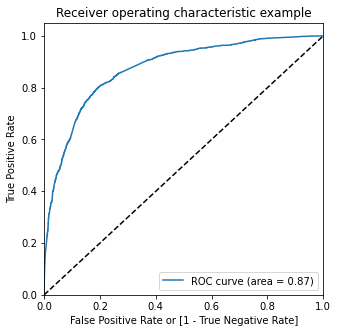

In [261]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [262]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.559156,1,1,1,1,1,1,1,0,0,0,0
1,0,0.242386,0,1,1,1,0,0,0,0,0,0,0
2,0,0.405581,0,1,1,1,1,1,0,0,0,0,0
3,0,0.242386,0,1,1,1,0,0,0,0,0,0,0
4,0,0.402360,0,1,1,1,1,1,0,0,0,0,0


In [263]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

#find values of sensitivity, accurace and specificity for each level of probablity
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.575657,0.966205,0.329397
0.2,0.2,0.722563,0.917345,0.599743
0.3,0.3,0.787750,0.824919,0.764313
0.4,0.4,0.808692,0.764658,0.836457
0.5,0.5,0.807117,0.697883,0.875995
0.6,0.6,0.786490,0.572883,0.921181
0.7,0.7,0.768068,0.489821,0.943517
0.8,0.8,0.749016,0.401466,0.968164
0.9,0.9,0.700992,0.246743,0.987420


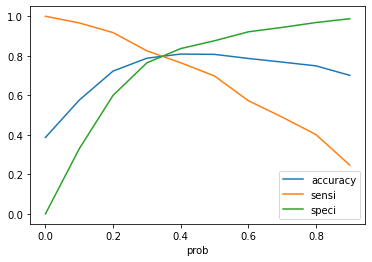

In [264]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [265]:

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.559156,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.242386,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.405581,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.242386,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.402360,0,1,1,1,1,1,0,0,0,0,0,1


In [266]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8041253345929775

In [267]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3137,  758],
       [ 486, 1970]], dtype=int64)

In [268]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [269]:
# Calculating the sensitivity
TP/(TP+FN)

0.8021172638436482

In [270]:
 #Calculating the specificity
TN/(TN+FP)

0.8053915275994865

# Prediction on Test Dataset

In [271]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit',
                                                                                                          'Total Time Spent on Website']])

In [272]:
col = X_train.columns

In [273]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,1,0,0,0,0,0,0,0,0,0
7212,1.0,0.028369,0.001320,1,0,0,0,0,0,0,1,1,0
2085,1.0,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0
4048,1.0,0.028369,0.617077,1,0,0,0,0,0,0,1,0,0
4790,1.0,0.028369,0.005282,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,0,1,0,0,0,1,0,0,0
8179,1.0,0.170213,0.148768,1,0,0,0,0,0,0,1,0,0
6236,1.0,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0
5240,1.0,0.078014,0.458627,1,0,0,0,0,0,0,1,0,0


In [274]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.370246
1,1,0.836169
2,1,0.982695
3,1,0.838926
4,0,0.077612


In [275]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.370246,1
1,1,0.836169,1
2,1,0.982695,1
3,1,0.838926,1
4,0,0.077612,0
...,...,...,...
2718,1,0.065134,0
2719,0,0.595993,1
2720,0,0.242386,0
2721,1,0.774506,1


In [276]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8009548292324642

In [277]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1401,  343],
       [ 199,  780]], dtype=int64)

In [278]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [279]:
TP/(TP+FN)

0.7967313585291114

In [280]:
TN/(TN+FP)

0.8033256880733946

# Precision-Recall

In [281]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3412,  483],
       [ 742, 1714]], dtype=int64)

In [282]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7801547564861174

In [283]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6978827361563518

In [284]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [285]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

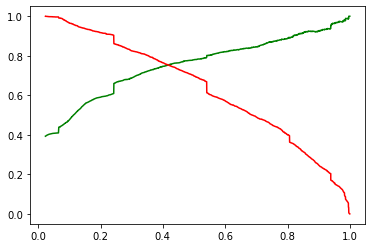

In [286]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [287]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.559156,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.242386,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.405581,0,1,1,1,1,1,0,0,0,0,0,0
3,0,0.242386,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.402360,0,1,1,1,1,1,0,0,0,0,0,0


In [288]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8085340891198236

In [289]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3275,  620],
       [ 596, 1860]], dtype=int64)

In [290]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [291]:
TP / (TP + FP)

0.75

In [292]:
TP / (TP + FN)

0.757328990228013

# Prediction on Test set

In [293]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.370246
1,1,0.836169
2,1,0.982695
3,1,0.838926
4,0,0.077612


In [294]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.370246,0
1,1,0.836169,1
2,1,0.982695,1
3,1,0.838926,1
4,0,0.077612,0
...,...,...,...
2718,1,0.065134,0
2719,0,0.595993,1
2720,0,0.242386,0
2721,1,0.774506,1


In [295]:

# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8082996694821888

In [296]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1477,  267],
       [ 255,  724]], dtype=int64)

In [297]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [298]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7305751765893037

In [299]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7395301327885597

**conclusion**

The total time spend on the Website.
Total number of visits.
When the lead source was:
a. Google
b. Direct traffic
c. Organic search
d. Welingak website
When the last activity was:
a. SMS
b. Olark chat conversation
When the lead origin is Lead add format.
When their current occupation is as a working professional.
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.